In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import types

## Stegnography

**How is Stegno?**
- We convert our text to binary.
- Then we change last bit in each pixel by the required bit of our text

### Message to Binary

In [13]:
def msgToBinary(message):
    # Convert each char in the string into 8 bits
    if type(message) == str:
        return ''.join([format(ord(i), '08b') for i in message])
    
    # Convert each byte/element into 8 bits
    elif type(message) == bytes or type(message) == np.ndarray:
        return [format(i, '08b') for i in message]
    
    # Convert numbers into 8 bits (int or np.uint8)
    elif type(message) == int or type(message) == np.uint8:
        return format(message, '08b')
    
    else: 
        raise TypeError('Input type not Supported')

### Hiding Data inside Image

In [30]:
def hide_message(img, message, delimeter="###"):

    # Calculate max bytes to encode (Total Pixels(bits) // 8)
    n_bytes = img.size // 8
    if len(message) > n_bytes:
        raise ValueError("Insufficient bytes, need bigger image or smaller text")


    # Using Delimeter (end of message)
    message += delimeter

    data_index = 0

    # Converting Message to Binary
    binary_message = msgToBinary(message)

    data_len = len(binary_message)
    for values in img:
        for pixel in values:
            # Convert Pixel into Binary
            b, g, r = msgToBinary(pixel)

            # Modify Least Sign Bit only if there is still data to hide
            if data_index < data_len:
                pixel[0] = int(b[:-1] + binary_message[data_index], 2)   #To convert to integers (base 2)
                data_index += 1

            if data_index < data_len:
                pixel[1] = int(g[:-1] + binary_message[data_index], 2)   #To convert to integers (base 2)
                data_index += 1

            if data_index < data_len:
                pixel[2] = int(r[:-1] + binary_message[data_index], 2)   #To convert to integers (base 2)
                data_index += 1

            # If finished : break
            if data_index >= data_len:
                break

    return img

### Showing Data (Decrypting)

In [35]:
def show_data(img, delimeter="###"):
    binary_data = ""
    delimeter_len = len(delimeter)
    
    for values in img:
        for pixel in values:
            # Extracing LSB from each pixel
            b,g,r = msgToBinary(pixel)
            binary_data += b[-1]
            binary_data += g[-1]            
            binary_data += r[-1] 
    
    # Split by 8 bits --> Converting to Bytes
    all_bytes = [binary_data[i:i+8] for i in range(0, len(binary_data), 8)]
    
    # Convery Bytes to Data
    decoded_data = ""
    for byte in all_bytes:
        decoded_data += chr(int(byte,2))
        if decoded_data.endswith(delimeter):
            decoded_data = decoded_data[:-delimeter_len]
            break
            
    return decoded_data

### Using All Functions

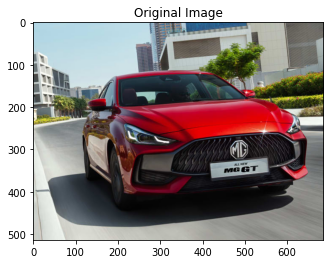

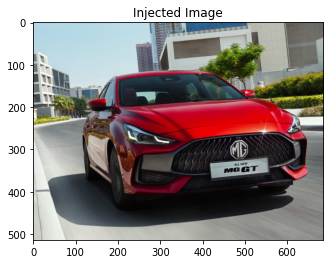

The Secret Message is: Hello Ahmed !!


In [37]:
img = cv2.imread('Images/car_mg.jpg')
message = "Hello Ahmed !!"

# Showing Original Image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

# Hiding Message
encrypted_img = hide_message(img, message)

# Showing Image Encrypted
plt.imshow(cv2.cvtColor(encrypted_img, cv2.COLOR_BGR2RGB))
plt.title('Injected Image')
plt.show()

# Getting The Message
secret_message = show_data(encrypted_img)
print('The Secret Message is: {}'.format(secret_message))